In [10]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from skimage import io, color, filters, morphology, segmentation, measure
from scipy import ndimage as ndi
import os

In [11]:
DATA_DIR = Path("DataScienceBowl-2018/stage1_train")

image_ids = os.listdir(DATA_DIR)

print("Total samples:", len(image_ids))

Total samples: 670


In [12]:
all_samples = sorted(DATA_DIR.iterdir())

counts_no_markers = []
counts_markers = []

for sample in all_samples:
    
    # Load image
    img_path = list((sample / "images").glob("*.png"))[0]
    image = io.imread(img_path)

    if image.ndim == 3:
        if image.shape[2] == 4:
            image = image[:, :, :3]
        image = color.rgb2gray(image)

    # Step 1: Binary segmentation (Otsu)
    threshold = filters.threshold_otsu(image)
    binary = image > threshold

    # Step 2: Distance transform
    distance = ndi.distance_transform_edt(binary)

    # Step 3: Watershed WITHOUT markers
    labels_no = segmentation.watershed(
        -distance,
        mask=binary
    )

    # Step 4: Generate markers
    local_max = morphology.local_maxima(distance)
    markers = measure.label(local_max)

    # Step 5: Watershed WITH markers
    labels_mark = segmentation.watershed(
        -distance,
        markers,
        mask=binary
    )

    counts_no_markers.append(np.max(labels_no))
    counts_markers.append(np.max(labels_mark))

print("Total images processed:", len(all_samples))

Total images processed: 670


In [13]:
print("Average nuclei count WITHOUT markers:",
      np.mean(counts_no_markers))

print("Average nuclei count WITH markers:",
      np.mean(counts_markers))

Average nuclei count WITHOUT markers: 312.82537313432834
Average nuclei count WITH markers: 134.81044776119404


### Visualizing any one sample

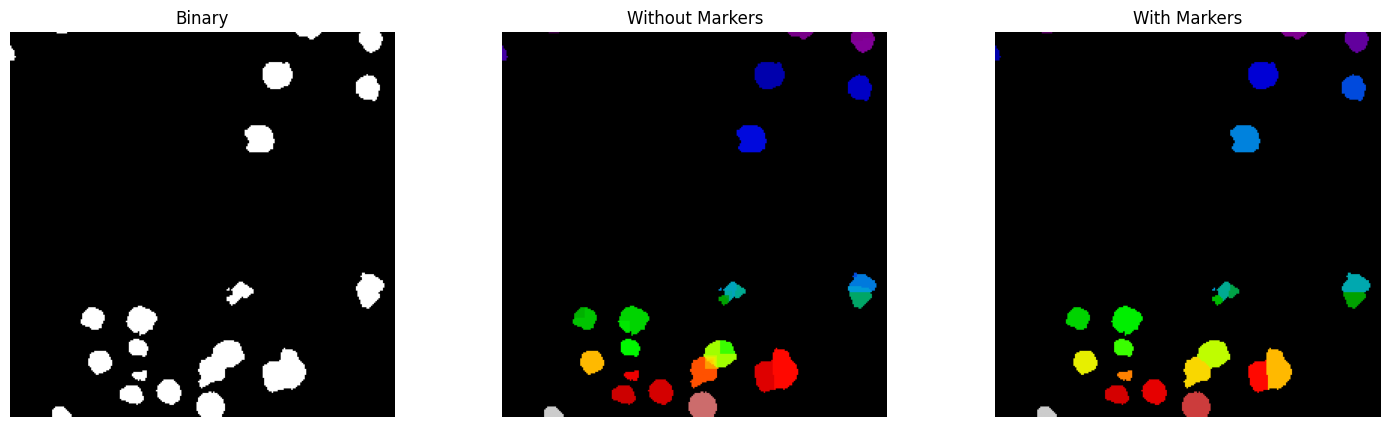

In [14]:
sample = all_samples[0]
img_path = list((sample / "images").glob("*.png"))[0]
image = io.imread(img_path)

if image.ndim == 3:
    if image.shape[2] == 4:
        image = image[:, :, :3]
    image = color.rgb2gray(image)

threshold = filters.threshold_otsu(image)
binary = image > threshold
distance = ndi.distance_transform_edt(binary)

labels_no = segmentation.watershed(-distance, mask=binary)

local_max = morphology.local_maxima(distance)
markers = measure.label(local_max)

labels_mark = segmentation.watershed(-distance, markers, mask=binary)

fig, ax = plt.subplots(1, 3, figsize=(18,5))

ax[0].imshow(binary, cmap='gray')
ax[0].set_title("Binary")

ax[1].imshow(labels_no, cmap='nipy_spectral')
ax[1].set_title("Without Markers")

ax[2].imshow(labels_mark, cmap='nipy_spectral')
ax[2].set_title("With Markers")

for a in ax:
    a.axis("off")

plt.show()